In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\MSI\anaconda3\envs\liver_segmentation\lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\MSI/.cache\torch\hub\master.zip
YOLOv5  2024-3-14 Python-3.8.18 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 9.72MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 para

In [6]:
img = "https://ultralytics.com/images/zidane.jpg"

In [7]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1687.2ms pre-process, 138.9ms inference, 236.5ms NMS per image at shape (1, 3, 384, 640)


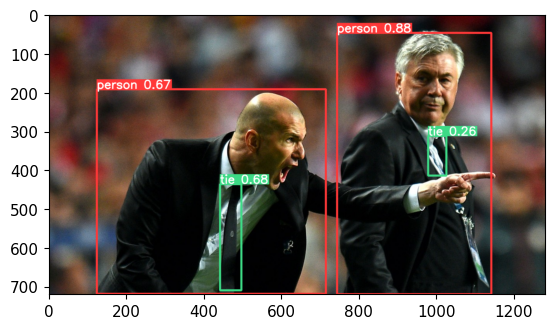

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [13]:
traffic = "https://www.geotab.com/CMS-Media-production/Blog/NA/_2018/July/traffic_congestion/blog-traffic-congestion-hero@2x.jpg"
results = model(traffic)
results.print()

image 1/1: 1224x2176 41 cars
Speed: 590.0ms pre-process, 9.6ms inference, 19.9ms NMS per image at shape (1, 3, 384, 640)


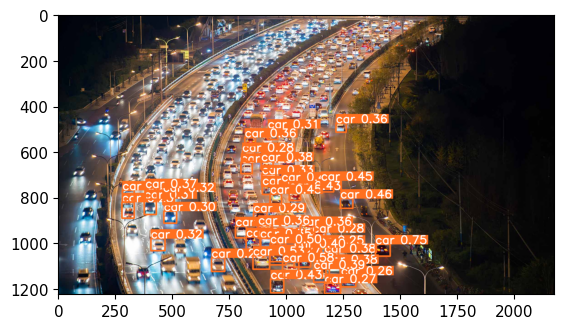

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow("YOLO", np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid
import os
import time

In [31]:
IMAGES_PATH = "C:/Users/MSI/Desktop/Drowsiness_Detection/data/images"
labels = ["awake", "drowsy"]
number_imgs = 20

In [28]:
cap = cv2.VideoCapture(0)

for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')
        
        ret, frame = cap.read()
        
        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        
        cv2.imwrite(img_name, frame)
        
        cv2.imshow('Image Collection', frame)
        
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [29]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [3]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [4]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  v7.0-294-gdb125a20 Python-3.8.18 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0

In [5]:
model = torch.hub.load("ultralytics/yolov5", "custom",
                       path="C:/Users/MSI/Desktop/Drowsiness_Detection/yolov5/runs/train/exp/weights/last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\MSI/.cache\torch\hub\master.zip
YOLOv5  2024-3-14 Python-3.8.18 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
img_awake = os.path.join("data", "images", "awake.1b301114-e235-11ee-852b-8cf8c50de7be.jpg")
img_drowsy = os.path.join("data", "images", "drowsy.44f9ef7d-e235-11ee-94e0-8cf8c50de7be.jpg")

In [7]:
results_1 = model(img_awake)
results_2 = model(img_drowsy)

In [8]:
results_1.print()

image 1/1: 480x640 1 awake
Speed: 10.8ms pre-process, 137.6ms inference, 97.5ms NMS per image at shape (1, 3, 480, 640)


In [9]:
results_2.print()

image 1/1: 480x640 1 drowsy
Speed: 2.7ms pre-process, 8.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


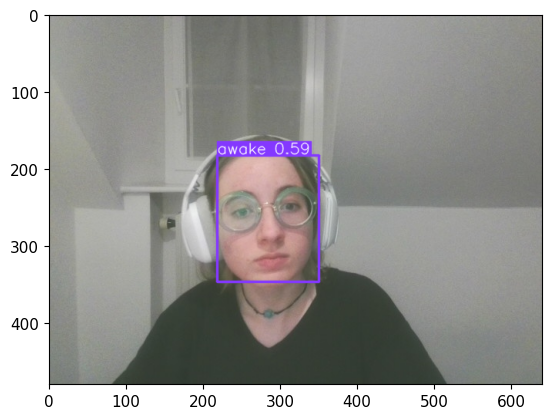

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results_1.render()))
plt.show()

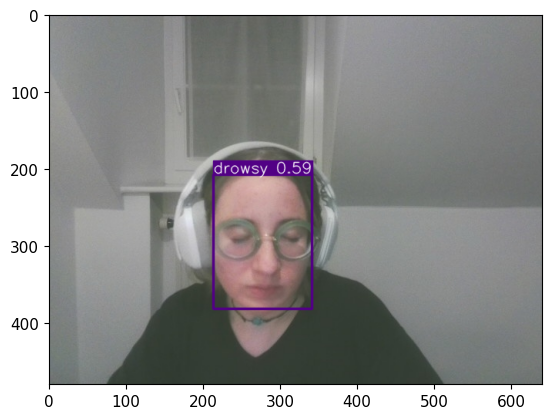

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results_2.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow("YOLO", np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()